## Pobranie danych z pliku

In [1]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Resampling klas

In [3]:
from imblearn.over_sampling import ADASYN

X_train, Y_train = ADASYN().fit_resample(X_train, Y_train)

Using TensorFlow backend.
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Inicjacja struktur danych do testów

In [4]:
scores_false_negative = []
scores_false_positive = []
methods = []

## Wybór metody

### PCA

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


pipeline = make_pipeline(StandardScaler(), PCA(n_components=15), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("PCA")

[[71018    64]
 [   24    96]]


### Feature aglomeration

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import datasets, cluster
pipeline = make_pipeline(StandardScaler(), cluster.FeatureAgglomeration(n_clusters=15), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("Feature Aglomeration")

[[71033    49]
 [   26    94]]


### KBest

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=15), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("K Best")

[[71031    51]
 [   18   102]]


### Variance threshold

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold

pipeline = make_pipeline(StandardScaler(), VarianceThreshold(threshold=0.8), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("Variance threshold")

[[71065    17]
 [   23    97]]


### Recursive feature elimination 

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


pipeline = make_pipeline(StandardScaler(), RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=15, step=5), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("RFE")

[[71030    52]
 [   21    99]]


###  Gaussian random projection

In [10]:
from sklearn import random_projection

methods.append("RFE")
pipeline = make_pipeline(StandardScaler(), random_projection.GaussianRandomProjection(n_components=15), MLPClassifier())
pipeline.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("GRP")

[[71023    59]
 [   30    90]]


## Wyniki

### False negative

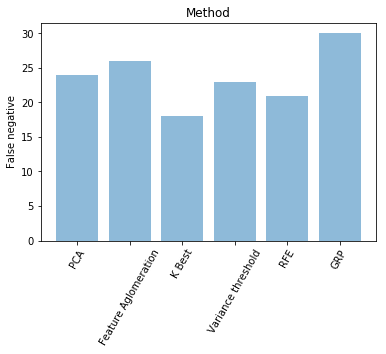

In [20]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Method')

plt.show()

### False positive

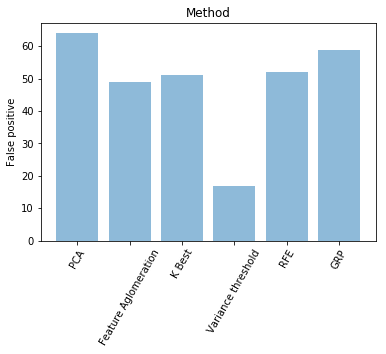

In [21]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False positive')
plt.title('Method')

plt.show()

## Wnioski

Jak widać różnice nie są znaczące, ale zauważalne. Ze względu na najlepszy wynik wybrano metodę wyboru K najlepszych cech